In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Your credentials here
client_id = "3335f2929cc54307ba85c8ac2b574743"
client_secret = "b590b9b820c54abf96e27c315cc2226c"

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

# Test request
results = sp.search(q="genre:pop", type="track", limit=5)

for idx, track in enumerate(results['tracks']['items']):
    print(f"{idx+1}. {track['name']} by {track['artists'][0]['name']}")


1. Die With A Smile by Lady Gaga
2. Antologia by Shakira
3. BIRDS OF A FEATHER by Billie Eilish
4. LUNA by Feid
5. Me Dediqué a Perderte by Alejandro Fernández


In [3]:
import pandas as pd
import time


genres = ['pop', 'rock', 'hip hop', 'edm', 'reggaeton', 'r&b', 'latin', 'country', 'jazz']


all_tracks = []

for genre in genres:
    print(f"Fetching tracks for genre: {genre}")
    try:
        # API Limit is 50 results per request
        results = sp.search(q=f'genre:{genre}', type='track', limit=50)
        tracks = results['tracks']['items']

        for track in tracks:
            try:
                all_tracks.append({
                    'name': track['name'],
                    'artist': track['artists'][0]['name'],
                    'popularity': track['popularity'],
                    'release_date': track['album']['release_date'],
                    'genre': genre
                })
            except Exception as e:
                print(f"Error processing a track: {e}")
    except Exception as e:
        print(f"Failed to get results for genre {genre}: {e}")
    
    time.sleep(0.5)  # Pause between API requests


df = pd.DataFrame(all_tracks)


print("Sample:")
print(df.head())


df.to_csv('../data/spotify_data.csv', index=False)
print("✅ Data saved to data/spotify_data.csv")


Fetching tracks for genre: pop
Fetching tracks for genre: rock
Fetching tracks for genre: hip hop
Fetching tracks for genre: edm
Fetching tracks for genre: reggaeton
Fetching tracks for genre: r&b
Fetching tracks for genre: latin
Fetching tracks for genre: country
Fetching tracks for genre: jazz
Sample:
                    name               artist  popularity release_date genre
0       Die With A Smile            Lady Gaga         100   2024-08-16   pop
1              Antologia              Shakira          83   1995-10-06   pop
2     BIRDS OF A FEATHER        Billie Eilish          99   2024-05-17   pop
3                   LUNA                 Feid          89   2023-12-01   pop
4  Me Dediqué a Perderte  Alejandro Fernández          82   2004-09-01   pop
✅ Data saved to data/spotify_data.csv


In [4]:

df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

df['release_year'] = df['release_date'].dt.year


df = df.dropna(subset=['release_year'])
df['release_year'] = df['release_year'].astype(int)



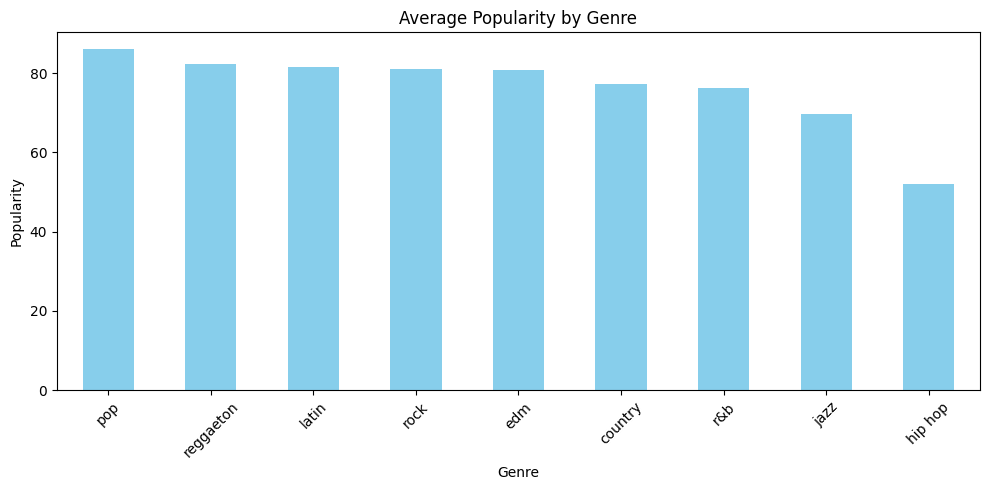

In [5]:
import matplotlib.pyplot as plt
genre_popularity = df.groupby('genre')['popularity'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
genre_popularity.plot(kind='bar', color='skyblue')
plt.title('Average Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


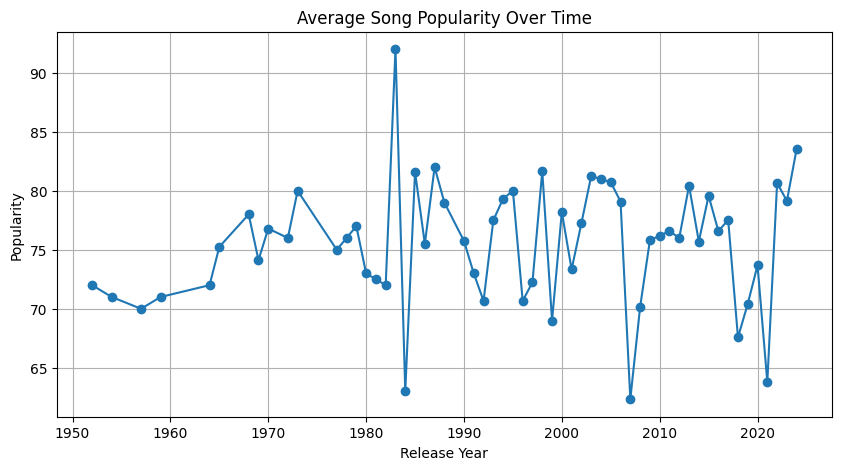

In [6]:
yearly_popularity = df.groupby('release_year')['popularity'].mean()

plt.figure(figsize=(10,5))
yearly_popularity.plot(marker='o')
plt.title('Average Song Popularity Over Time')
plt.xlabel('Release Year')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()


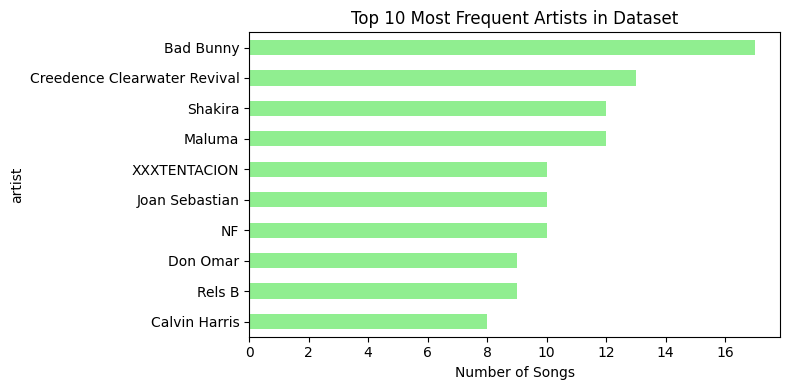

In [7]:
top_artists = df['artist'].value_counts().head(10)

plt.figure(figsize=(8,4))
top_artists.plot(kind='barh', color='lightgreen')
plt.title('Top 10 Most Frequent Artists in Dataset')
plt.xlabel('Number of Songs')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


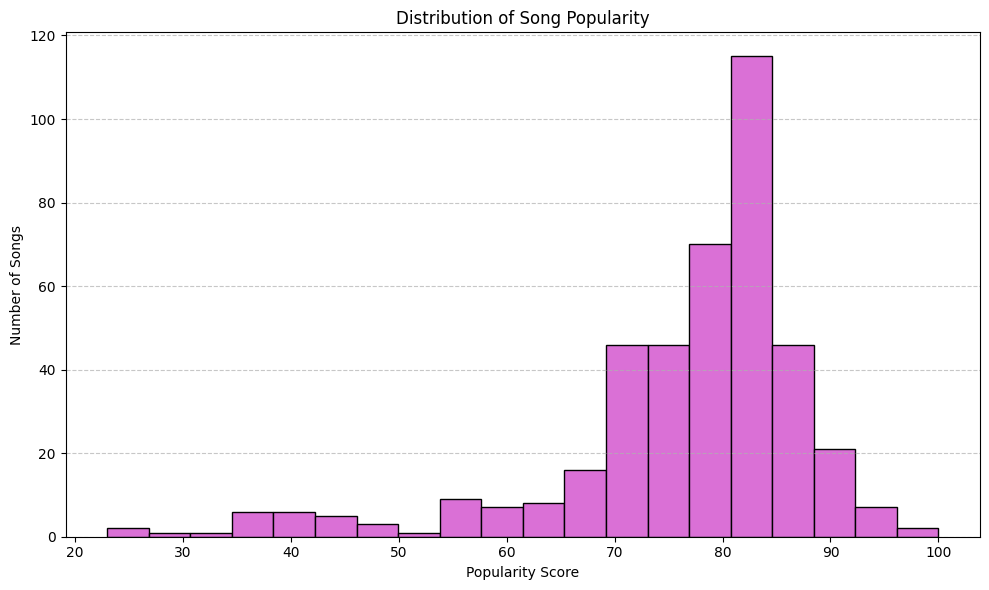

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df['popularity'], bins=20, color='orchid', edgecolor='black')
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Number of Songs')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:


# Year: playlist ID dictionary (you can expand this list)
mexico_playlists = {
    2024: "tAqJtE0dS6KDbmE4Zl4FvA",  # current Top 50 Mexico
    2023: "5Zm2nkE0qjInP7YTPToK61",
    2022: "4rKXcDfUWmcZzvPvfXtsVw",
    2021: "3ZgmfR6lsnCwdffZUan8EA",
    2020: "5k4zFHZv7VEZTnQ3R36eXN",
    2019: "3qjm7uWGINyNdpYd2Tb9hc",
    2018: "5nXvxZTynEjsT3MZ2EiN6v",
    2017: "5vlkIqQnVXVbA1cSJn0gDm",
    2016: "2nswSxYRcGQgSDzM0z9X3I",
    2015: "5B7v3zcmRSgTRFvLAb8L5j"
}

data = []

for year, playlist_id in mexico_playlists.items():
    print(f"Fetching playlist for {year}...")

    try:
        results = sp.playlist_items(playlist_id, limit=50)
        tracks = results['items']

        for item in tracks:
            track = item['track']
            name = track['name']
            artist_name = track['artists'][0]['name']
            artist_id = track['artists'][0]['id']
            release_date = track['album']['release_date']
            popularity = track['popularity']

            # Get genres via artist ID
            try:
                artist_info = sp.artist(artist_id)
                genres = artist_info.get('genres', [])
                genre = genres[0] if genres else 'unknown'
            except:
                genre = 'unknown'

            data.append({
                'name': name,
                'artist': artist_name,
                'genre': genre,
                'popularity': popularity,
                'release_date': release_date,
                'playlist_year': year,
                'playlist_name': f'Top 50 Mexico {year}'
            })
            time.sleep(0.1)  # for artist API rate limit

    except Exception as e:
        print(f"Failed to fetch playlist for {year}: {e}")
    time.sleep(0.3)  # between playlists

# Final DataFrame
df_mexico = pd.DataFrame(data)
df_mexico.to_csv('../data/top50_mexico_2015_2024.csv', index=False)
print("✅ Data saved to: data/top50_mexico_2015_2024.csv")

# Preview
df_mexico.head()


In [10]:
# Search for artist
results = sp.search(q="Tito Double P", type="artist")
artist = results['artists']['items'][0]
artist_id = artist['id']

print("Found artist:", artist['name'])
print("Artist ID:", artist_id)


Found artist: Tito Double P
Artist ID: 5eumcnUkdmGvkvcsx1WFNG


In [11]:
# Get all albums/singles/appearances
albums = sp.artist_albums(artist_id, album_type='album,single,appears_on', limit=50)['items']

# To avoid duplicates
seen = set()
tracks_data = []

for album in albums:
    album_id = album['id']
    release_date = album['release_date']

    tracks = sp.album_tracks(album_id)['items']
    for track in tracks:
        track_id = track['id']
        track_name = track['name']
        if track_id in seen:
            continue
        seen.add(track_id)
        try:
            track_info = sp.track(track_id)
            popularity = track_info['popularity']
        except:
            popularity = None

        tracks_data.append({
            'track_name': track_name,
            'album': album['name'],
            'release_date': release_date,
            'popularity': popularity
        })

print(f"Collected {len(tracks_data)} unique tracks")


Collected 236 unique tracks


In [12]:
df_tito = pd.DataFrame(tracks_data)
df_tito['release_date'] = pd.to_datetime(df_tito['release_date'], errors='coerce')
df_tito = df_tito.dropna(subset=['release_date'])

# Sort and preview
df_tito = df_tito.sort_values('release_date')
df_tito.head()


,track_name,album,release_date,popularity
61,DEMBOW BÉLICO,DEMBOW BÉLICO,2023-06-03,70
60,GAVILÁN II,GAVILÁN II,2023-06-22,47
59,LA PEOPLE,LA PEOPLE,2023-06-22,42
117,ZAPATA,GÉNESIS,2023-06-29,69
123,BYE,GÉNESIS,2023-06-29,72


In [14]:
df_tito_outliers = df_tito[df_tito['popularity'] < 20]
df_tito_outliers

,track_name,album,release_date,popularity
134,Iván el Chapito,Somos Leyenda,2025-03-27,1


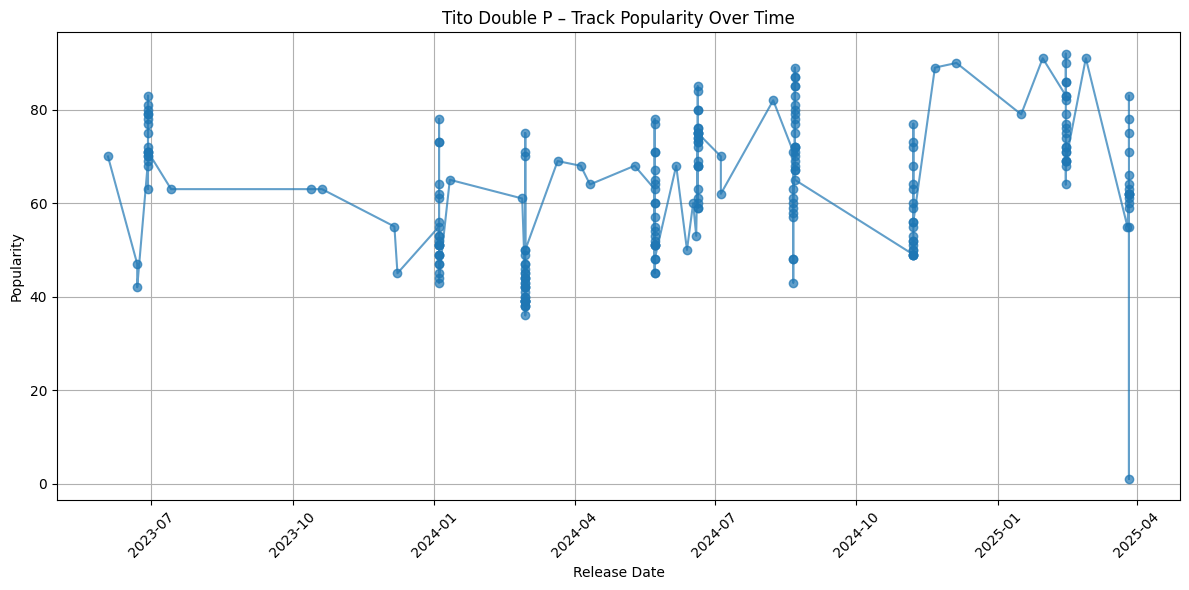

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df_tito['release_date'], df_tito['popularity'], marker='o', linestyle='-', alpha=0.7)
plt.title('Tito Double P – Track Popularity Over Time')
plt.xlabel('Release Date')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


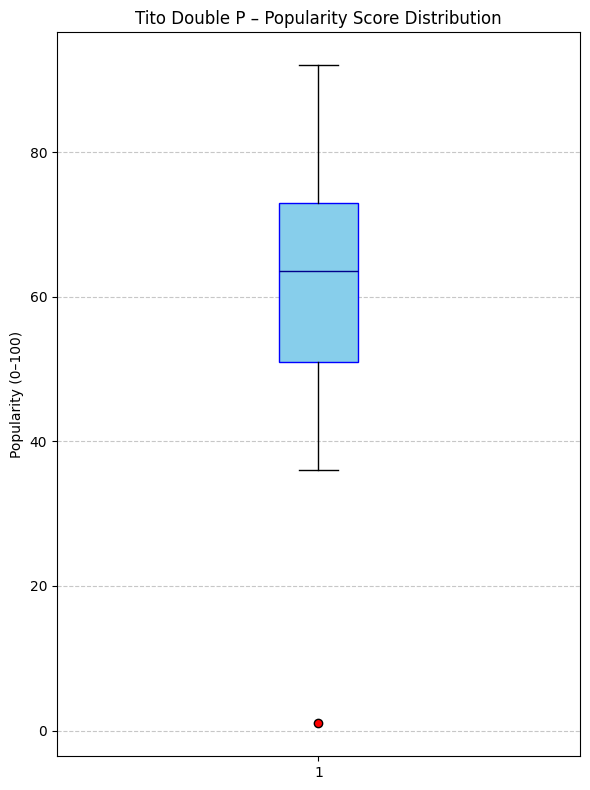

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 8))
plt.boxplot(df_tito['popularity'].dropna(), vert=True, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='blue'),
            medianprops=dict(color='darkblue'),
            flierprops=dict(marker='o', markerfacecolor='red', markersize=6))

plt.title("Tito Double P – Popularity Score Distribution")
plt.ylabel("Popularity (0–100)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


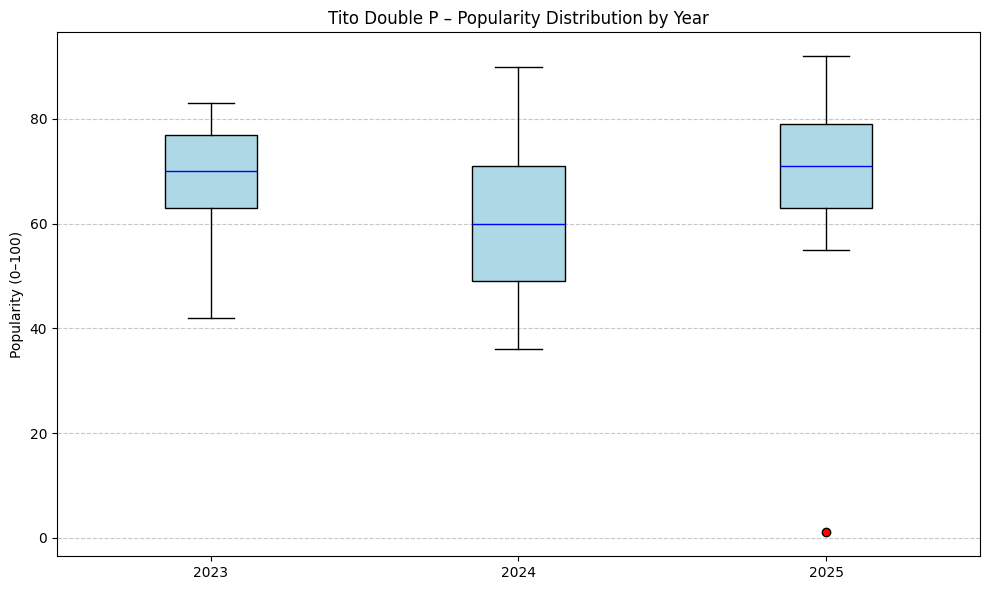

In [16]:
# Ensure release_year column is set
df_tito['release_year'] = df_tito['release_date'].dt.year

# Filter tracks by year
pop_2023 = df_tito[df_tito['release_year'] == 2023]['popularity'].dropna()
pop_2024 = df_tito[df_tito['release_year'] == 2024]['popularity'].dropna()
pop_2025 = df_tito[df_tito['release_year'] == 2025]['popularity'].dropna()

# Combine data and labels
data = [pop_2023, pop_2024, pop_2025]
labels = ['2023', '2024', '2025']

# Plot
plt.figure(figsize=(10, 6))
plt.boxplot(data, patch_artist=True,
            boxprops=dict(facecolor='lightblue'),
            medianprops=dict(color='blue'),
            flierprops=dict(marker='o', markerfacecolor='red', markersize=6))

plt.title("Tito Double P – Popularity Distribution by Year")
plt.xticks([1, 2, 3], labels)
plt.ylabel("Popularity (0–100)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [17]:
# Search for Natanael Cano
results = sp.search(q="Natanael Cano", type="artist")
artist_cano = results['artists']['items'][0]
cano_id = artist_cano['id']

print("Found:", artist_cano['name'])


Found: Natanael Cano


In [21]:


albums = []
offset = 0
while True:
    results = sp.artist_albums(cano_id, album_type='album,single,appears_on', limit=50, offset=offset)
    new_albums = results['items']
    if not new_albums:
        break
    albums.extend(new_albums)
    offset += 50

seen = set()
cano_tracks = []

for album in albums:
    album_id = album['id']
    release_date = album['release_date']
    album_name = album['name']

    tracks = sp.album_tracks(album_id)['items']
    for track in tracks:
        track_id = track['id']
        if track_id in seen:
            continue
        seen.add(track_id)

        try:
            track_info = sp.track(track_id)
            popularity = track_info['popularity']
        except:
            popularity = None

        cano_tracks.append({
            'track_name': track['name'],
            'album': album_name,
            'release_date': release_date,
            'popularity': popularity
        })

print(f"✅ Collected {len(cano_tracks)} tracks from Natanael Cano")


✅ Collected 3820 tracks from Natanael Cano


In [22]:
df_cano = pd.DataFrame(cano_tracks)
df_cano['release_date'] = pd.to_datetime(df_cano['release_date'], errors='coerce')
df_cano = df_cano.dropna(subset=['release_date'])
df_cano['release_year'] = df_cano['release_date'].dt.year



In [23]:
df_cano

,track_name,album,release_date,popularity,release_year
0,Alto Mando - Live,Recordando Ariel Camacho (Live),2025-03-27,64,2025
1,Bien Guerrero - Live,Recordando Ariel Camacho (Live),2025-03-27,63,2025
2,El Karma - Live,Recordando Ariel Camacho (Live),2025-03-27,72,2025
3,Entre Platica y Dudas - Live,Recordando Ariel Camacho (Live),2025-03-27,62,2025
4,Toro Encartado - Live,Recordando Ariel Camacho (Live),2025-03-27,61,2025
...,...,...,...,...,...
3815,Riptide,June's Hot Music Chart,2024-08-14,0,2024
3816,In the End,June's Hot Music Chart,2024-08-14,0,2024
3817,I Don't Wanna Wait,June's Hot Music Chart,2024-08-14,0,2024
3818,300 Noches,June's Hot Music Chart,2024-08-14,0,2024


In [24]:
df_cano = df_cano.sort_values('release_date')
df_cano

,track_name,album,release_date,popularity,release_year
260,El De Los Lentes Gucci,El De Los Lentes Gucci,2018-07-10,56,2018
259,Sour Diesel,Sour Diesel,2018-09-04,40,2018
258,Platicame De Ti,Platicame De Ti,2018-09-20,63,2018
1585,La Chona (En Vivo),En Vivo Vol. 1,2018-10-26,0,2018
1583,Fino Pero Sordo (En Vivo),En Vivo Vol. 1,2018-10-26,9,2018
...,...,...,...,...,...
3491,Mi primer millon,Colección Verano 2025,2025-04-05,0,2025
3492,Leave the Door Open,Colección Verano 2025,2025-04-05,0,2025
3493,Envolver,Colección Verano 2025,2025-04-05,0,2025
3486,"Young, Wild & Free (feta. Bruno Mars)",Colección Verano 2025,2025-04-05,0,2025
